<a href="https://colab.research.google.com/github/nikwif/notebook-google-search/blob/main/copy_of_off_white_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
query = "114866704"
search = f"https://www.google.com/search?q={query}"
response = requests.get(search)

NameError: name 'requests' is not defined

In [ ]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36"}

In [ ]:
response

<Response [200]>

'<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>OWAD122C99JER0030110 - Google Search</title><script nonce="zXHqJOOUN5Tu9h5MGkYEnQ">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a=c==="1"||c==="q"&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if(a.tagName==="A"){a=a.getAttribute("data-nohref")==="1";break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){window.google=window.google||{};var a=window.performance&&window.performance.timing&&"navigationStart"in window.performance.timing,b=google.stvsc&&google.stvsc.ns,c=a?b||window.performance.timing.navigationStart:void 0,d=google.stvsc&&google.stvsc.rs,f
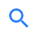
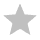
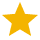
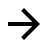
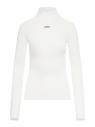
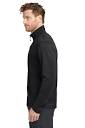

In [ ]:
response.text

In [ ]:
len(response.text)

83502

In [ ]:

html_content = response.text

In [ ]:
from bs4 import BeautifulSoup
import requests
from urllib.parse import urlparse, parse_qs

# Assuming 'html_content' contains the HTML document
soup = BeautifulSoup(html_content, 'html.parser')

# Initialize list to hold results
results = []

# Loop through search results items
for index, result in enumerate(soup.select('.xpd')):
    title = result.select_one('.vvjwJb')  # Selects title
    url_tag = result.select_one('a[href]')  # Selects the anchor tag containing the URL if it has an href attribute
    url = url_tag['href'] if url_tag else None  # Extracts the URL if available

    # Properly parse the URL to handle redirect URLs
    if url:
        parsed_url = urlparse(url)
        if '/url' in parsed_url.path:
            query_params = parse_qs(parsed_url.query)
            url = query_params.get('q', [None])[0]  # Extracts 'q' parameter which contains the actual URL

    snippet = result.select_one('.s3v9rd').get_text() if result.select_one('.s3v9rd') else None  # Selects snippet text
    source = urlparse(url).netloc if url else None  # Extracts source domain

    # Append structured result as dictionary
    results.append({
        "index": index,
        "title": title.get_text() if title else "No title",
        "url": url,
        "snippet": snippet,
        "source": source
    })

# Print results
for result in results:
    print(result)


{'index': 0, 'title': 'No title', 'url': '/search?q=OWAD122C99JER0030110&sca_esv=362529b1f3dde5c1&ie=UTF-8&source=lnt&tbs=qdr:h&sa=X&ved=0ahUKEwjgr--X0raJAxU6JzQIHTudGugQpwUIDQ', 'snippet': None, 'source': ''}
{'index': 1, 'title': 'white off stamp second skin l/s turtleneck', 'url': 'https://www.off---white.com/en-us/shopping/off-white-white-off-stamp-second-skin-l-s-turtleneck-23348161?srsltid=AfmBOoqJ4x-d3Ur7hbKcHqDQxkXgPfL2cNNaaBlkKKkT46GWoswe3e3T', 'snippet': '$495.00 Free delivery In stockMade in Italy. Product ID: OWAD122C99JER0030110. Product Details. Colors: WHITE BLACK. Sizes (IT):. 36. 38. 40. 42. 44. 46. Size Help. Size Help.', 'source': 'www.off---white.com'}
{'index': 2, 'title': 'Off-White logo-print second-skin Top - Farfetch', 'url': 'https://www.farfetch.com/shopping/women/off-white-logo-print-second-skin-top-item-23348161.aspx', 'snippet': '$276.00 to $495.00 Free delivery In stockHighlights · white · stretch-jersey · lightweight construction · high neck · long sleev

In [ ]:
# Group by source
buckets = {}
for item in results:
    source = item['source']
    if source not in buckets:
        buckets[source] = []
    buckets[source].append(item)

# Retrieve "off-white" bucket
off_white_bucket = buckets.get('www.off---white.com', [])
off_white_bucket

[{'index': 1,
  'title': 'white off stamp second skin l/s turtleneck',
  'url': 'https://www.off---white.com/en-us/shopping/off-white-white-off-stamp-second-skin-l-s-turtleneck-23348161?srsltid=AfmBOoqJ4x-d3Ur7hbKcHqDQxkXgPfL2cNNaaBlkKKkT46GWoswe3e3T',
  'snippet': '$495.00 Free delivery In stockMade in Italy. Product ID: OWAD122C99JER0030110. Product Details. Colors: WHITE BLACK. Sizes (IT):. 36. 38. 40. 42. 44. 46. Size Help. Size Help.',
  'source': 'www.off---white.com'}]

In [ ]:
matching_entries = [item for item in off_white_bucket if item['snippet'] and query in item['snippet']]
matching_entries

[{'index': 1,
  'title': 'white off stamp second skin l/s turtleneck',
  'url': 'https://www.off---white.com/en-us/shopping/off-white-white-off-stamp-second-skin-l-s-turtleneck-23348161?srsltid=AfmBOoqJ4x-d3Ur7hbKcHqDQxkXgPfL2cNNaaBlkKKkT46GWoswe3e3T',
  'snippet': '$495.00 Free delivery In stockMade in Italy. Product ID: OWAD122C99JER0030110. Product Details. Colors: WHITE BLACK. Sizes (IT):. 36. 38. 40. 42. 44. 46. Size Help. Size Help.',
  'source': 'www.off---white.com'}]

In [ ]:
p_response = requests.get(matching_entries[0]['url'],headers=headers)
p_response.text

'<!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->\n<head>\n<title>Attention Required! | Cloudflare</title>\n<meta charset="UTF-8" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n<meta name="robots" content="noindex, nofollow" />\n<meta name="viewport" content="width=device-width,initial-scale=1" />\n<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" />\n<!--[if lt IE 9]><link rel="stylesheet" id=\'cf_styles-ie-css\' href="/cdn-cgi/styles/cf.errors.ie.css" /><![endif]-->\n<style>body{margin:0;padding:0}</style>\n\n\n<!--[if gte IE 10]><!-->\n<script>\n  if (!navigator.cookieEnabled) {\n    window.addEventListene

In [ ]:
soup = BeautifulSoup(p_response.text, 'html.parser')

# Example to find product ID and MSRP
product_id = soup.find('span', class_='product-id').get_text().split(': ')[1]
msrp = soup.find('span', class_='msrp').get_text().split(': ')[1]
description = soup.find('div', class_='description').p.get_text()

print(f"Product ID: {product_id}")
print(f"MSRP: {msrp}")
print(f"Description: {description}")

AttributeError: 'NoneType' object has no attribute 'get_text'

In [ ]:
search_ids = ["BTM-00020", "GF20B013", "GS21O031", "BTM-00046", "BTM-00031", "TOP-00064", "GF21T092", "TOP-00110", "TOP-00074", "BTM-00022", "TOP-00020", "TOP-00118", "TOP-00108", "BTM-00051", "BTM-00045", "BTM-00050", "BTM-00006", "TOP-00116", "GF21T079", "BTM-00033", "1S24S024", "ATL-00004", "GF20B023", "BTM-00004", "ATL-00021", "BTM-00011", "BTM-00009", "BTM-00013", "BTM-00012", "BTM-00017", "BTM-00016", "BTM-00015", "BTM-00014", "BTM-00043", "BTM-00035", "BTM-00018", "GS21T054", "GS21B037", "GF21K077", "JKT-00026", "JKT-00011", "GF21D091", "GF20T010", "JKT-00005", "JKT-00004", "GS21T055", "SKT-00001", "TOP-00035", "TOP-00034", "TOP-00033", "SKT-00005", "TOP-00023", "TOP-00017", "TOP-00016", "SKT-00014", "SKT-00013", "SKT-00011", "SKT-00012", "SKT-00007", "TOP-00032", "TOP-00026", "TOP-00052", "TOP-00050", "TOP-00059", "TOP-00058", "TOP-00053", "TOP-00071", "TOP-00067", "TOP-00094", "TOP-00077", "TOP-00111", "TOP-00109", "TOP-00096", "TOP-00041", "TOP-00042", "TOP-00114", "TOP-00115", "TOP-00049", "TOP-00047", "TOP-00120", "3F23T171", "1F23T156", "TOP-00102", "1F23T165", "1F23T127", "1F23W126", "2F23W176", "2F23W177", "3F23W173", "BTM-00041", "1F23T157", "3F23T174", "1F23T183", "1F23J063", "1F23B069", "3F23J042", "1F23J036", "1F23B066", "3F23T168", "1F23T144", "1F23S019", "1F23T150", "1F23B073", "3F23B082", "BTM-00054", "3F23T166", "1F23T130", "3F23T169", "1F23T147", "TOP-00122", "OTW-00020", "TOP-00106", "2F23T198", "JKT-00027", "BTM-00039", "BTM-00038", "TOP-00107", "1F23T133", "2F23J051", "OTW-00021", "1F23B075", "3F23T139", "1F23T125", "1F23B072", "1F23D063", "OTW-00022", "JKT-00034", "1F23T134", "1F23J059", "3F23B064", "1F23B058", "1F23T146", "3F23B083", "1F23B077", "1F23B098", "1F23T137", "1F23T151", "JKT-00029", "BTM-00029", "TOP-00101", "1F23T160", "3F23D058", "1F23D052", "3F23B079", "1F23B068", "TOP-00098", "1F23T162", "2S24B095", "2S24B098", "2S24T196", "2S24J065", "2S24O025", "2S24J064", "1S24T273", "1S24T225", "1S24T229", "1F23T154", "2S24T193", "2S24T186", "3S24B111", "1S24B110", "1S24T231", "3S24T232", "3S24J078", "1S24J077", "1S24J079", "2S24B120", "2S24J081", "2S24B086", "2S24B112", "2S24T189", "2S24T234", "3S24B118", "1S24B113", "3S24T223", "1S24T209", "1S24B097", "2S24T226", "2S24B087", "1F24T240", "1S24T227", "3S24T199", "1S24T195", "3S24T202", "1S24T194", "3S24B101", "1S24B090", "1S24T228", "1S24W224", "1S24W180", "3S24T276", ""]

In [ ]:
search_ids = ['689304360258','689304321075']

In [ ]:
search_ids = ["BTM-00013", "BTM-00012", "BTM-00016", "BTM-00015", "SKT-00014",]

In [ ]:
search_ids = ["1F23B058 KNOCKOUT PINK", "1F23B058 MIDNIGHT", "1F23B066 BLACK", "1F23B066 VALENTINE RED", "1F23B068 PLAID", "1F23B069 BLACK-IVORY COLORBLOCK", "1F23B072 BLACK", "1F23B072 CASSIS", "1F23B073 BLACK", "1F23B073 SOFT PINK", "1F23B075 BRONZE METALLIC", "1F23B077 NAVY", "1F23B098 ACID LIME", "1F23D034 MIDNIGHT", "1F23D042 BLACK - WHITE COLORBLOCK", "1F23D047 BLACK", "1F23D052 BLACK", "1F23D052 VALENTINE RED", "1F23D063 BERRY", "1F23J036 NAVY", "1F23J044 ACID LIME", "1F23J044 BLACK BEAUTY", "1F23J044 SUNSET GRADIENT", "1F23J047 PLAID", "1F23J050 BLACK BEAUTY", "1F23J059 BLACK", "1F23J059 IVORY", "1F23J059 SOFT PINK", "1F23J060 RED CHEETAH", "1F23J063 ACID LIME", "1F23J080 BLACK BEAUTY", "1F23J131 BLACK BEAUTY", "1F23J131 VALENTINE RED", "1F23O024 ORANGE", "1F23S019 BLACK", "1F23T125 KNOCKOUT PINK", "1F23T125 MIDNIGHT", "1F23T127 ACID LIME", "1F23T127 SNOW WHITE", "1F23T130 BLACK", "1F23T130 VALENTINE RED", "1F23T130 WHITE", "1F23T133 SNOW WHITE", "1F23T134 BLACK", "1F23T134 CASSIS", "1F23T137 GOLD FOIL", "1F23T144 BLACK", "1F23T144 CAMEL", "1F23T146 BLACK BEAUTY", "1F23T147 BLACK BEAUTY", "1F23T150 BLACK", "1F23T151 BLACK", "1F23T154 BRIGHT WHITE", "1F23T154 OPEN AIR", "1F23T156 SNOW WHITE", "1F23T157 BLACK", "1F23T157 VALENTINE RED", "1F23T158 SEQUIN BRONZE", "1F23T160 BLACK METALLIC", "1F23T162 SNOW WHITE", "1F23T165 BLACK BEAUTY", "1F23T183 ACID LIME", "1F23W126 BLACK", "1F23W126 METALLIC SILVER", "1F24J089 GOLD", "1F24J089 SILVER", "1F24T240 BLACK BEAUTY", "1S23J037 BLACK BEAUTY", "1S23J037 SOHO STONE", "1S24B090 OPEN AIR", "1S24B090 ORANGE", "1S24B097 INDIGO", "1S24B110 SNOW WHITE", "1S24B113 BLACK & WHITE STRIPE", "1S24D077 BLACK & WHITE", "1S24D078 SAFFRON", "1S24D079 BLACK BEAUTY", "1S24D079 GREY MELANGE", "1S24D080 BLACK BEAUTY", "1S24D080 ROSE", "1S24D080 SLATE GREY", "1S24D080 TIE DYE", "1S24J067 PEACOCK", "1S24J067 SAFFRON", "1S24J077 SNOW WHITE", "1S24J079 RAINBOW SPILL", "1S24J114 BLACK", "1S24S024 BBL", "1S24T194 BLACK BEAUTY", "1S24T195 BRIGHT WHITE", "1S24T209 BLACK & WHITE STRIPE", "1S24T225 BLACK BEAUTY", "1S24T225 BRIGHT WHITE", "1S24T225 SAFFRON", "1S24T227 BLACK & WHITE STRIPE", "1S24T227 BLACK BEAUTY", "1S24T228 BEIGE GLITTER", "1S24T229 BLACK BEAUTY", "1S24T231 TOFFEE GLITTER", "1S24T273 BLACK BEAUTY", "1S24W180 BLACK BEAUTY", "1S24W224 BLACK BEAUTY", "2F23J051 BLACK", "2F23T198 BLACK-SLATE", "2F23T198 BLACK-WHITE", "2F23W176 BLACK SWOOSH", "2F23W177 BW COMPASS", "2S24B086 CANTEEN", "2S24B086 FEATHER GREY", "2S24B087 CHERRY TOMATO", "2S24B087 FEATHER GREY", "2S24B095 BRISTOL BLUE", "2S24B095 CANTEEN", "2S24B095 FLORAL", "2S24B098 BLACK PLUM", "2S24B098 CANTEEN", "2S24B112 QUIET GREY", "2S24B120 GREY & YELLOW PRINT", "2S24J064 NIGHT OWL", "2S24J065 CANTEEN", "2S24J081 FLORAL PRINT", "2S24O025 FEATHER GREY COLORBLOCK", "2S24T186 CANTEEN", "2S24T189 BRIGHT WHITE", "2S24T189 CANTEEN", "2S24T189 CHERRY TOMATO", "2S24T189 SKYRIDE", "2S24T193 WHITE", "2S24T196 BLACK PLUM", "2S24T196 CANTEEN", "2S24T226 TIE DYE", "2S24T234 BRIGHT WHITE", "3F23B064 KNOCKOUT PINK", "3F23B064 MIDNIGHT", "3F23B079 PLAID", "3F23B082 BLACK STRIPE", "3F23B083 NAVY", "3F23D055 BLACK - WHITE COLORBLOCK", "3F23D058 BLACK", "3F23D058 VALENTINE RED", "3F23J042 NAVY", "3F23J053 ACID LIME", "3F23J053 BLACK BEAUTY", "3F23J053 SUNSET GRADIENT", "3F23J055 PLAID", "3F23J057 SEQUIN BRONZE", "3F23J071 RED CHEETAH", "3F23T139 KNOCKOUT PINK", "3F23T139 MIDNIGHT", "3F23T166 BLACK", "3F23T166 VALENTINE RED", "3F23T166 WHITE", "3F23T168 BLACK", "3F23T168 CAMEL", "3F23T169 BLACK BEAUTY", "3F23T171 SNOW WHITE", "3F23T174 BLACK BEAUTY", "3F23W173 BLACK", "3F23W173 METALLIC SILVER", "3F24J091 GOLD", "3F24J091 SILVER", "3S24B101 OPEN AIR", "3S24B101 ORANGE", "3S24B111 SNOW WHITE", "3S24B118 BLACK & WHITE STRIPE", "3S24D071 SAFFRON", "3S24J068 PEACOCK", "3S24J068 SAFFRON", "3S24J073 BLACK BEAUTY", "3S24J078 SNOW WHITE", "3S24T199 BRIGHT WHITE", "3S24T202 BLACK BEAUTY", "3S24T223 BLACK & WHITE STRIPE", "3S24T232 BLACK BEAUTY", "3S24T232 BRIGHT WHITE", "3S24T232 SAFFRON", "3S24T276 BLACK BEAUTY", "ATL-00004 BLK", "ATL-00006 BLK", "ATL-00021 OLT", "BTM-00004 BLK", "BTM-00006 BLACK BEAUTY", "BTM-00006 Midnight", "BTM-00006 PORT", "BTM-00006 White", "BTM-00009 SGY", "BTM-00011 BBL", "BTM-00011 FRG", "BTM-00012 BBL", "BTM-00013 BBL", "BTM-00014 BLK", "BTM-00015 BBL", "BTM-00016 BBL", "BTM-00017 BBL", "BTM-00017 FRG", "BTM-00018 BBL", "BTM-00020 GREENE ST", "BTM-00022 BLACK BEAUTY", "BTM-00029 KNOCKOUT PINK", "BTM-00029 MIDNIGHT CB", "BTM-00029 PORT CB", "BTM-00031 BLACK BEAUTY", "BTM-00031 CHELSEA BL", "BTM-00033 BLACK BEAUTY", "BTM-00033 NEW KHAKI", "BTM-00035 MID", "BTM-00035 WHT", "BTM-00038 BLACK", "BTM-00038 BORDEAUX", "BTM-00038 NAVY", "BTM-00039 BLACK", "BTM-00039 BORDEAUX", "BTM-00039 NAVY", "BTM-00041 BLACK", "BTM-00041 GREY", "BTM-00041 NAVY", "BTM-00043 BBL", "BTM-00043 NER", "BTM-00045 BLACK BEAUTY", "BTM-00045 PORT", "BTM-00046 BLACK BEAUTY", "BTM-00046 CHELSEA BL", "BTM-00050 CHICORY COFFEE", "BTM-00050 NEON SOLE", "BTM-00051 CHICORY COFFEE", "BTM-00051 NEON SOLE", "BTM-00054 BLACK STRIPE", "DRS-00003 BLK", "DRS-00003 PKL", "DRS-00004 BLK", "DRS-00004 RDE", "DRS-00006 SDS", "DRS-00011 WHT", "DRS-00012 BBL", "DRS-00012 FBL", "DRS-00013 BBL", "DRS-00018 BBL", "DRS-00019 BBL", "DRS-00021 GREENE ST", "DRS-00023 BCB", "DRS-00023 LWH", "DRS-00024 BCB", "DRS-00026 BLACK BEAUTY", "DRS-00026 BOLD VIOLE", "DRS-00026 CHELSEA BL", "DRS-00026 PARADISE P", "DRS-00029 WEN", "DRS-00031 BLACK BEAUTY", "DRS-00031 BOLD VIOLE", "DRS-00031 CHELSEA BL", "DRS-00031 PARADISE P", "DRS-00032 BBL", "DRS-00033 BCB", "DRS-00033 LWH", "GF20B013 Black", "GF20B023 BLK", "GF20O015 BLK", "GF20O015 GPL", "GF20T010 BLK", "GF20T010 SWW", "GF21D091 GRY", "GF21D091 MID", "GF21D108 MID", "GF21K077 MER", "GF21K077 MID", "GF21T079 Silver", "GF21T092 Black", "GF21T092 Dark Heather Grey", "GF21T092 Midnight", "GF21T092 White", "GS21B037 BLK", "GS21O030 BLK", "GS21O031 Black", "GS21O052 Black", "GS21O052 White", "GS21T054 BLK", "GS21T055 BLK", "JKT-00004 BLK", "JKT-00004 PKL", "JKT-00005 BLK", "JKT-00006 MID", "JKT-00011 BBL", "JKT-00016 PORT", "JKT-00016 Royal Blue", "JKT-00016 White", "JKT-00020 GREENE ST", "JKT-00021 BLACK BEAUTY", "JKT-00021 CHELSEA BL", "JKT-00026 BBL", "JKT-00026 NER", "JKT-00027 BLACK", "JKT-00027 BORDEAUX", "JKT-00027 NAVY", "JKT-00029 KNOCKOUT PINK", "JKT-00029 MIDNIGHT CB", "JKT-00029 PORT CB", "JKT-00034 BLACK IRIDESCENT", "OTW-00003 SDS", "OTW-00004 ENH", "OTW-00008 BBL", "OTW-00008 FBL", "OTW-00008 WRM", "OTW-00009 CCG", "OTW-00012 FBL", "OTW-00012 WRM", "OTW-00020 BLACK", "OTW-00021 BLACK", "OTW-00022 PINK HB", "OTW-00022 WHITE HB", "SKT-00001 MID", "SKT-00005 PKL", "SKT-00007 BBL", "SKT-00011 BRRY", "SKT-00012 BBL", "SKT-00013 BBL", "SKT-00013 LWH", "SKT-00013 WHT", "SKT-00014 BBL", "TOP-00016 BLK", "TOP-00017 MID", "TOP-00020 Midnight", "TOP-00020 White", "TOP-00023 LCM", "TOP-00026 MID", "TOP-00032 BBL", "TOP-00033 CCG", "TOP-00033 WRM", "TOP-00034 CCG", "TOP-00034 WRM", "TOP-00035 ATY", "TOP-00035 BBL", "TOP-00035 WRM", "TOP-00041 BBL", "TOP-00042 BBL", "TOP-00047 BBL", "TOP-00049 BBL", "TOP-00049 WHT", "TOP-00050 CHRL", "TOP-00050 WCRM", "TOP-00052 BBL", "TOP-00053 BBL", "TOP-00053 DCML", "TOP-00058 BRRY", "TOP-00059 BRRY", "TOP-00064 BLACK BEAUTY", "TOP-00064 LILAC WHISPER", "TOP-00064 White", "TOP-00067 BBL", "TOP-00067 SOS", "TOP-00071 BBL", "TOP-00071 BDV", "TOP-00071 CAB", "TOP-00071 WHT", "TOP-00074 BLACK BEAUTY", "TOP-00074 GREENE ST", "TOP-00074 SOHO STONE", "TOP-00077 BBL", "TOP-00077 LWH", "TOP-00077 WHT", "TOP-00094 MID", "TOP-00094 NES", "TOP-00096 BBL", "TOP-00096 NER", "TOP-00098 BLACK", "TOP-00098 PORT", "TOP-00098 SLATE", "TOP-00101 BLACK", "TOP-00102 ACID LIME", "TOP-00102 BLACK", "TOP-00102 FIERY RED", "TOP-00102 KNOCKOUT PINK", "TOP-00102 WHITE", "TOP-00106 BLACK-WHITE", "TOP-00107 BLACK", "TOP-00107 FIERY RED", "TOP-00107 GRADIENT", "TOP-00107 QUIET HARBOR", "TOP-00107 WHITE HOUNDSTOOTH", "TOP-00108 NEON SOLE", "TOP-00108 White", "TOP-00109 BBL", "TOP-00109 BDV", "TOP-00109 CAB", "TOP-00109 WHT", "TOP-00110 BLACK BEAUTY", "TOP-00110 GREENE ST", "TOP-00110 SOHO STONE", "TOP-00111 MID", "TOP-00111 NES", "TOP-00114 MID", "TOP-00114 WHT", "TOP-00115 BBL", "TOP-00115 LWH", "TOP-00115 WHT", "TOP-00116 BLACK BEAUTY", "TOP-00116 LILAC WHISPER", "TOP-00116 Midnight", "TOP-00116 NEON SOLE", "TOP-00116 White", "TOP-00118 NEON SOLE", "TOP-00118 White", "TOP-00120 BBL", "TOP-00120 BRRY", "TOP-00122 BLACK"]

In [ ]:
import random
import time,os,re
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs
import csv
import subprocess


def initialize_driver():
    """Initialize and return a configured Selenium WebDriver instance."""
    agents = ['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.3',
              'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.3',
              'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.3',
              'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.3',
              'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36 OpenWave/93.4.3888.3']

    chrome_options = Options()
    # chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36")
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--disable-blink-features=AutomationControlled")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
    chrome_options.add_experimental_option('useAutomationExtension', False)
    chrome_options.page_load_strategy = 'eager'

    service = Service()  # Replace with the path to your chromedriver if needed
    driver = webdriver.Chrome(service=service, options=chrome_options)
    driver.set_page_load_timeout(60)
    # Additional anti-bot techniques
    random_agent = random.choice(agents)
    print(random_agent)
    driver.execute_cdp_cmd('Network.setUserAgentOverride', {
        "userAgent": str(random_agent),
        "platform": "Windows"})
    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")
#
    params = {
        "latitude": 40.7127,
        "longitude": -74.0059,
        "accuracy": 100
    }

    driver.execute_cdp_cmd("Page.setGeolocationOverride", params)

    return driver
def save_to_csv(file_path, data):
    with open(file_path, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # Write the header
        writer.writerow(['query','Product ID', 'Name', 'Description', 'SKU', 'Color', 'Category', 'Brand', 'Price', 'Currency', 'Condition', 'Availability', 'Seller', 'URL', 'Images'])
        # Write data rows
        for row in data:
            writer.writerow(row)
def mimic_browser_activity(driver):
    """Simulate human-like browser activity."""
    # Simulate human-like scrolling
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(random.uniform(2, 4))

    # Random interaction with non-essential elements
    try:
        clickable_element = WebDriverWait(driver, 5).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, "a, button"))
        )
        clickable_element.click()
        time.sleep(random.uniform(1, 3))
    except Exception:
        pass  # Ignore if no clickable element is found

def process_page(data_for_csv, driver, id, search_url, csv_file_path):
    """Process a single product page and save the results to a CSV file."""
    try:
        driver.delete_all_cookies()
        print("Search Url- ", search_url)

        # Attempt to load the page and extract data up to 3 times
        count = 0
        delay = 15  # Initial delay of 15 seconds
        max_attempts = 5  # Maximum number of attempts

        while count < max_attempts:
            driver.get(search_url)
            # Simulate human-like behavior to avoid detection
            # mimic_browser_activity(driver)

            # Extract product schema and process if available
            product_schemas = extract_product_schema(driver.page_source)
            if product_schemas:
                for product in product_schemas:
                    images = ', '.join(product['image'])
                    offers = product['offers']
                    return [
                        str(id),
                        product['productID'],
                        product['name'],
                        product['description'],
                        product['sku'],
                        product['color'],
                        product['category'],
                        product['brand']['name'],
                        offers['price'],
                        offers['priceCurrency'],
                        offers['itemCondition'],
                        offers['availability'],
                        offers['seller']['name'],
                        offers['url'],
                        images
                    ]
            else:
            # Increment count after each failed attempt
              vpn_connection_cycle()
              count += 1
              print(f"Attempt {count}: No valid product schema found.")

            if count >= 3:
                # After 3 unsuccessful attempts, start adding delay
                print(f"Waiting for {delay} seconds before the next attempt...")
                time.sleep(delay)
                vpn_connection_cycle()
                delay += 15  # Increase the delay by 15 seconds for each subsequent attempt

        vpn_connection_cycle()
        # After max attempts, try a manual parse or log the failure
        driver.quit()
        driver = initialize_driver()
        driver.get(search_url)
        driver.get(search_url)
        product_details = manual_parse(driver.page_source)
        print(product_details)
        if product_details:
            # Assuming you have a way to handle missing product details
            return [
                str(id),
                product_details.get('productID', 'missing'),
                product_details.get('name', 'missing'),
                'missing details not schema',
                'missing details not schema',
                'missing details not schema',
                'missing details not schema',
                'missing details not schema',
                product_details.get('price', 'missing'),
                product_details.get('priceCurrency', 'missing'),
                'missing details not schema',
                'missing details not schema',
                'missing details not schema',
                search_url,
                'missing details not schema',
            ]
        else:
            return None

    except Exception as e:
        print(e)
        # Optionally log the exception or handle differently
        return None

def process_row(driver, id, search_url, csv_file_path):
    """Process a single product page and save the results to a CSV file."""
    try:
        driver.delete_all_cookies()
        print("Search Url- ")
        print(search_url)

        driver.get(search_url)

        return driver.page_source

    except Exception as e:
        # save_to_csv(csv_file_path, [[id, '', '', '', '', '', search_url, str(e)]])
        print(e)
        return None
import pandas as pd
import os
def mark_rows_as_processed(csv_path, processed_indices):
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Update the 'Processed' column for the processed rows
    df.loc[processed_indices, 'Processed'] = 1

    # Save the updated DataFrame back to CSV
    df.to_csv(csv_path, index=False)

def setup_csv_from_excel(excel_path, csv_path,output_path):
    # Load the Excel file
    df_excel = pd.read_excel(excel_path)
    print(df_excel.head())

    # print("Loaded Excel data into list:", excel_data_list)
    # Determine if the CSV needs to be created
    if not os.path.exists(csv_path):
        # Include 'Processed' column initialized to 0
        df_excel['Processed'] = 0
        # Save to CSV
        df_excel.to_csv(csv_path, index=False)
        print(f"CSV created: {csv_path}")
    else:
        # Load the CSV if it exists
        print(f"CSV already exists: {csv_path}")
        df_csv = pd.read_csv(csv_path)
        # Ensure it has a 'Processed' column
        if 'Processed' not in df_csv.columns:
            df_csv['Processed'] = 0
            df_csv.to_csv(csv_path, index=False)


    if os.path.exists(output_path):
        # Load the CSV if it exists
        print(f"CSV already exists: {csv_path}")
        df_csv_out = pd.read_csv(output_path)
        df_csv_out = df_csv_out.values.tolist()
    else:
      df_csv_out = []

    return df_csv_out
def load_unprocessed_rows(csv_path):
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Ensure there is a 'Processed' column, add if not present
    if 'Processed' not in df.columns:
        df['Processed'] = 0  # Initialize all as unprocessed if the column was missing
        df.to_csv(csv_path, index=False)  # Save the file with the new column

    # Filter out the unprocessed rows
    unprocessed_df = df[df['Processed'] == 0]


    # Extract values from the first column
    # .iloc[:,0] accesses the first column of the DataFrame
    first_column_values = unprocessed_df.iloc[:,0].tolist()

    return first_column_values

def parse_google_results(soup):
        results = []
        for g in soup.find_all('div', class_='g'):
            links = g.find_all('a')
            if links and 'href' in links[0].attrs:  # check if 'href' attribute exists
                results.append(links[0]['href'])
        return results
import requests
import subprocess
import os

def check_ip():
    # List of IP check services
    services = [
        'https://api.ipify.org',
        'https://ipinfo.io/ip',
        'https://api.myip.com'
    ]
    for service in services:
        try:
            response = requests.get(service)
            if response.status_code == 200:
                return response.text.strip()  # Strip to clean any extra whitespace/newlines
        except requests.RequestException as e:
            print(f"Failed to fetch IP from {service}: {e}")

    return None  # Return None to indicate failure
from bs4 import BeautifulSoup

def manual_parse(content):
    # Create a BeautifulSoup object
    soup = BeautifulSoup(content, 'html.parser')

    # Check if the page is a Cloudflare error page
    if soup.find('a', href='https://www.cloudflare.com/5xx-error-landing'):
        print("Cloudflare error detected. Attempting to connect to VPN...")
        vpn_connection_cycle()
        return None

    # Initialize the result dictionary with defaults for missing data
    result = {
        "priceCurrency": "Currency Not Found",
        "price": "Price Not Found",
        "name": "Title Not Found",
        "productID": "Product ID Not Found",
        "images": []
    }

    # Extract name
    name_tag = soup.find('h1', class_='css-azjk2j')
    if name_tag:
        result['name'] = name_tag.get_text(strip=True)

    # Extract price and currency symbol
    price_tag = soup.find('span', class_='css-bks3r1')
    if price_tag:
        price_text = price_tag.get_text(strip=True)
        if price_text.startswith('$'):
            result['priceCurrency'] = 'USD'
            result['price'] = price_text[1:]  # Remove the dollar sign
        else:
            # Handle other symbols or use regex to find numbers and isolate the symbol
            result['price'] = price_text

    # Extract product ID
    product_id_tag = soup.find('p', class_='css-izt7py')
    if product_id_tag and ':' in product_id_tag.text:
        parts = product_id_tag.text.split(': ')
        if len(parts) > 1:
            result['productID'] = parts[1].strip()

    # Extract image URLs
    img_tags = soup.select('section img')
    image_urls = [img['src'] for img in img_tags]
    result['images'] = ', '.join(image_urls)

    return result
def connect_vpn():
    nordvpn_dir = "C:\\Program Files\\NordVPN\\"
    if os.path.exists(nordvpn_dir):
        os.chdir(nordvpn_dir)
        command = 'nordvpn -c'
        result = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        time.sleep(20)
        return result.stdout.decode() + "\n" + result.stderr.decode()
    else:
        return f"The directory {nordvpn_dir} does not exist. Please check the installation path."

def vpn_connection_cycle(max_retries=5, cooldown_period=120):
    initial_ip = check_ip()
    print("Current IP Address:", initial_ip if initial_ip else "Failed to fetch initial IP.")
    attempt = 0

    while attempt < max_retries:
        print(f"Attempt {attempt+1} of {max_retries}: Connecting to VPN...")
        vpn_response = connect_vpn()
        print("VPN Response:", vpn_response)
        time.sleep(10)  # Wait for the VPN to fully establish the connection
        new_ip = check_ip()
        print("New IP Address after VPN connection:", new_ip if new_ip else "Failed to fetch new IP.")

        if new_ip and new_ip != initial_ip:
            print("IP address changed successfully.")
            break
        elif new_ip is None:
            print(f"All IP services failed. Entering cooldown period of {cooldown_period} seconds...")
            time.sleep(cooldown_period)
            print("Retrying after cooldown...")

        attempt += 1
        if attempt == max_retries:
            print("Failed to change IP after maximum retries.")
            break

def find_cloudflare_error_links(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    error_links = soup.find_all('a', href="https://www.cloudflare.com/5xx-error-landing")
    return error_links


def main():

    vpn_connection_cycle()

    csv_file_path = "C:\\Users\\ICON\\Downloads\\product_data.csv"
    csv_file_path_working = 'C:\\Users\\ICON\\Downloads\\working.csv'
    # query = "OWAD122C99JER0030110"
    file_path = 'C:\\Users\\ICON\\Downloads\\OffWhiteRRPsNeeded.xlsx'  # Specify your file path
    # column_values = read_excel_to_list(file_path)
    excel_data_list = setup_csv_from_excel(file_path, csv_file_path_working,csv_file_path)
    print(excel_data_list)
    if excel_data_list:
      offset = len(excel_data_list)
      print(offset)
    else:
      offset = 0
    unprocessed_list  = load_unprocessed_rows(csv_file_path_working)
    driver = initialize_driver()
    for mainIndex,query in enumerate(unprocessed_list):
        mainIndex = mainIndex + offset
        search_ids = []
        search = f"https://www.google.com/search?q={query}"
        time.sleep(random.randint(5, 30))
        response = process_row(driver, query, search, csv_file_path)

        if response is None:

          response = process_row(driver, query, search, csv_file_path)
          print('gg')


        # response = requests.get(search)

        soup = BeautifulSoup(response, 'html.parser')

        # Initialize list to hold results
        results = []
        new_results = parse_google_results(soup)
        print(new_results)
        # Loop through search results items
        for index, result in enumerate(new_results):
            url = result
            # Properly parse the URL to handle redirect URLs
            if url:
                parsed_url = urlparse(url)
                if '/url' in parsed_url.path:
                    query_params = parse_qs(parsed_url.query)
                    url = query_params.get('q', [None])[0]  # Extracts 'q' parameter which contains the actual URL

            # snippet = result.select_one('.s3v9rd').get_text() if result.select_one('.s3v9rd') else None  # Selects snippet text
            source = urlparse(url).netloc if url else None  # Extracts source domain


            title = None
            # Append structured result as dictionary
            results.append({
                "index": index,
                "title": title.get_text() if title else "title",
                "url": url,
                "snippet": 'snippet',
                "source": source
            })
      # Group by source
        buckets = {}
        for item in results:
            source = item['source']
            if source not in buckets:
                buckets[source] = []
            buckets[source].append(item)

        # Retrieve "off-white" bucket
        off_white_bucket = buckets.get('www.off---white.com', [None])
        matching_entries = off_white_bucket
        if matching_entries:
          if matching_entries[0]:
            search_ids = [matching_entries[0]['url']]  # Replace with your actual search IDs
        else:
          print('gotta try again')

        for index, id in enumerate(search_ids):
            time.sleep(random.randint(5, 30))
            # search = f"https://www.google.com/search?q={search_ids}"
            print(f"Processing ID: {query} with URL: {search_ids}")
            if 'en-us' in id:
              row = process_page(excel_data_list,driver, query, id, csv_file_path)
              if row is None:
                  count = 0
                  while count < 3:
                      vpn_connection_cycle()
                      try:
                          row = process_page(excel_data_list,driver, query, id, csv_file_path)
                          if row:
                              break
                      except Exception as e:
                          count += 1
                          print(e)
                          time.sleep(5)

              excel_data_list.append(row)
            else:
              updated_id = re.sub(r'/[a-z]{2}-[a-z]{2}', '/en-us', id)
              row = process_page(excel_data_list,driver, query, updated_id, csv_file_path)
              if row is None:
                  count = 0
                  while count < 3:
                      vpn_connection_cycle()
                      try:
                          row = process_page(excel_data_list,driver, query, updated_id, csv_file_path)
                          if row:
                              break
                      except Exception as e:
                          count += 1
                          time.sleep(5)
                          print(e)
              excel_data_list.append(row)
        save_to_csv(csv_file_path, excel_data_list)
        mark_rows_as_processed(csv_file_path_working, mainIndex)
        # Close the driver

    driver.quit()
main()

# query = "OWAD122C99JER0030110"
# search = f"https://www.google.com/search?q={query}"
# response = requests.get(search)

Current IP Address: 185.199.103.254
Attempt 1 of 5: Connecting to VPN...
VPN Response: 

New IP Address after VPN connection: 185.187.243.139
IP address changed successfully.
                Style #  Category                               Description
0  OMIA189C99LEA0070140  SNEAKERS  OUT OF OFFICE CALF LEATHER WHITE LIGHT B
1  OMIA294G23LEA0011801  SNEAKERS       NIKE AF1 MID LTHR YELLOW - WHITE 10
2  OMIA297T24LEA0010110  SNEAKERS          OW_NIKE AF1 MID WHITE - BLACK 10
3  OMIA189C99LEA0070110  SNEAKERS  OUT OF OFFICE CALF LEATHER WHITE BLACK 3
4  OMIA189C99LEA0120110  SNEAKERS  OUT OF OFFICE ''FOR WALKING'' WHITE BLAC
CSV already exists: C:\Users\ICON\Downloads\working.csv
CSV already exists: C:\Users\ICON\Downloads\working.csv
[['OMIA189C99LEA0070140', 20191178, 'WHITE/LIGHT BLUE OUT OF OFFICE in blue  | Off-White™ Official US ', 'Shop white/light blue leather panelled design signature Arrows motif signature Zip Tie tag front lace-up fastening logo-debossed tongue perforated toeb

KeyboardInterrupt: 

V2


In [ ]:
import openpyxl
def read_excel_to_list(file_path, column_index=1):
    # Load the workbook and select the first worksheet
    workbook = openpyxl.load_workbook(file_path)
    sheet = workbook.active

    # Read the specified column (default is the first column)
    values = []
    for row in sheet.iter_rows(min_col=column_index, max_col=column_index):
        for cell in row:
            values.append(cell.value)  # Append the cell value to the list

    return values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
  import json
  def extract_product_schema(html_content):
        product_schemas = []  # List to store all found product schemas

        try:
            soup = BeautifulSoup(html_content, 'html.parser')
            schema_tags = soup.find_all('script', {'type': 'application/ld+json'})
            print(schema_tags)
            for tag in schema_tags:
                try:
                    data = json.loads(tag.text)
                    print(data)
                    if data.get('@type') == 'Product':
                        # Log the raw product schema for debugging
                        print("Raw Product Schema: %s", json.dumps(data, indent=4))
                        product_schemas.append(data)
                except json.JSONDecodeError:
                    continue

            if not product_schemas:
                print("No Product schema found in the HTML content.")
                return None

            return product_schemas
        except Exception as e:
            print(f"Error extracting product schemas from HTML: {e}")
            return None


In [ ]:
product_schemas = extract_product_schema(page_source)

Raw Product Schema: %s {
    "@context": "http://schema.org/",
    "@type": "Product",
    "name": "WHITE OFF STAMP SECOND SKIN L/S TURTLENECK in white  | Off-White\u2122 Official US ",
    "description": "Shop white stretch-jersey lightweight construction high neck long sleeves logo print at the chest straight hem pull-on style ",
    "image": [
        "https://cdn-images.farfetch-contents.com/off-white-white-off-stamp-second-skin-l-s-turtleneck_23348161_54078370_322.jpg",
        "https://cdn-images.farfetch-contents.com/off-white-white-off-stamp-second-skin-l-s-turtleneck_23348161_54078371_322.jpg",
        "https://cdn-images.farfetch-contents.com/off-white-white-off-stamp-second-skin-l-s-turtleneck_23348161_54078368_322.jpg",
        "https://cdn-images.farfetch-contents.com/off-white-white-off-stamp-second-skin-l-s-turtleneck_23348161_54078367_322.jpg",
        "https://cdn-images.farfetch-contents.com/off-white-white-off-stamp-second-skin-l-s-turtleneck_23348161_54078372_322.jp

In [ ]:
product_schemas

[{'@context': 'http://schema.org/',
  '@type': 'Product',
  'name': 'WHITE OFF STAMP SECOND SKIN L/S TURTLENECK in white  | Off-White™ Official US ',
  'description': 'Shop white stretch-jersey lightweight construction high neck long sleeves logo print at the chest straight hem pull-on style ',
  'image': ['https://cdn-images.farfetch-contents.com/off-white-white-off-stamp-second-skin-l-s-turtleneck_23348161_54078370_322.jpg',
   'https://cdn-images.farfetch-contents.com/off-white-white-off-stamp-second-skin-l-s-turtleneck_23348161_54078371_322.jpg',
   'https://cdn-images.farfetch-contents.com/off-white-white-off-stamp-second-skin-l-s-turtleneck_23348161_54078368_322.jpg',
   'https://cdn-images.farfetch-contents.com/off-white-white-off-stamp-second-skin-l-s-turtleneck_23348161_54078367_322.jpg',
   'https://cdn-images.farfetch-contents.com/off-white-white-off-stamp-second-skin-l-s-turtleneck_23348161_54078372_322.jpg',
   'https://cdn-images.farfetch-contents.com/off-white-white-off-

In [ ]:
!pip install pandas

In [ ]:
!pip install selenium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 20.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
!wget https://storage.googleapis.com/chrome-for-testing-public/127.0.6533.119/linux64/chromedriver-linux64.zip -O chromedriver.zip


--2024-10-30 17:32:57--  https://storage.googleapis.com/chrome-for-testing-public/127.0.6533.119/linux64/chromedriver-linux64.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9330902 (8.9M) [application/zip]
Saving to: ‘chromedriver.zip’

chromedriver.zip    100%[===================>]   8.90M  --.-KB/s    in 0.1s    

2024-10-30 17:32:58 (76.8 MB/s) - ‘chromedriver.zip’ saved [9330902/9330902]



In [ ]:
!curl -o chromedriver.zip https://storage.googleapis.com/chrome-for-testing-public/127.0.6533.119/linux64/chromedriver-linux64.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9112k  100 9112k    0     0  50.0M      0 --:--:-- --:--:-- --:--:-- 50.2M


In [ ]:
!unzip chromedriver.zip


Archive:  chromedriver.zip
  inflating: chromedriver-linux64/LICENSE.chromedriver  
  inflating: chromedriver-linux64/THIRD_PARTY_NOTICES.chromedriver  
  inflating: chromedriver-linux64/chromedriver  


In [ ]:
!mv chromedriver-linux64 /usr/local/bin/


In [ ]:
!pip install openpyxl
